<a href="https://colab.research.google.com/github/HowkMii/Oranges-vs.-Grapefruit/blob/main/Oranges_vs_Grapefruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/datasets

/content/drive/MyDrive/datasets


In [ ]:
ls

citrus.csv


In [ ]:
# from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")

Ran the import statements.


In [ ]:
df = pd.read_csv("citrus.csv")

In [ ]:
X = df.drop(['name'], axis = 1)
y = df['name']
y = y.replace("orange", 0)
y = y.replace("grapefruit", 1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [ ]:
df_train = pd.concat([X_train,y_train],axis=1)
df_test = pd.concat([X_test,y_test],axis=1)

In [ ]:
df_train.head()

,diameter,weight,red,green,blue,name
799,7.2,134.3,152,70,20,0
1069,7.5,138.1,163,90,2,0
8410,12.1,206.5,155,72,25,1
9436,13.0,220.7,161,69,25,1
5099,9.1,157.6,154,67,4,1


In [ ]:
# shuffle the training set
df_train = df_train.reindex(np.random.permutation(df_train.index)) 

In [ ]:
df_train_mean = df_train.mean()
df_train_std = df_train.std()
df_train_norm = (df_train - df_train_mean)/df_train_std

# Calculate the Z-scores of each column in the test set.
df_test_mean = df_test.mean()
df_test_std = df_test.std()
df_test_norm = (df_test - df_test_mean)/df_test_std

print("Normalized the values.")

Normalized the values.


In [ ]:
# Create an empty list that will eventually hold all created feature columns.
feature_columns = []

# We scaled all the columns, including latitude and longitude, into their
# Z scores. So, instead of picking a resolution in degrees, we're going
# to use resolution_in_Zs.  A resolution_in_Zs of 1 corresponds to 
# a full standard deviation. 
resolution_in_Zs = 0.3  # 3/10 of a standard deviation.

diameter = tf.feature_column.numeric_column("diameter")
feature_columns.append(diameter)

# Represent population as a floating-point value.
weight = tf.feature_column.numeric_column("weight")
feature_columns.append(weight)

red = tf.feature_column.numeric_column("red")
feature_columns.append(red)
green = tf.feature_column.numeric_column("green")
feature_columns.append(green)
blue = tf.feature_column.numeric_column("blue")
feature_columns.append(blue)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [ ]:
def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [ ]:
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # Get details that will be useful for plotting the loss curve.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["mean_squared_error"]

  return epochs, rmse   

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


10/10 [==============================] - 1s 2ms/step - loss: 1.4974 - mean_squared_error: 1.4974
Epoch 2/15
10/10 [==============================] - 0s 2ms/step - loss: 1.0197 - mean_squared_error: 1.0197
Epoch 3/15
10/10 [==============================] - 0s 2ms/step - loss: 0.7533 - mean_squared_error: 0.7533
Epoch 4/15
10/10 [==============================] - 0s 2ms/step - loss: 0.5734 - mean_squared_error: 0.5734
Epoch 5/15
10/10 [==============================] - 0s 2ms/step - loss: 0.4537 - mean_squared_error: 0.4537
Epoch 6/15
10/10 [==============================] - 0s 2ms/step - loss: 0.3788 - mean_squared_error: 0.3788
Epoch 7/15
10/10 [==============================] - 0s 3ms/step - loss: 0.3377 - mean_squared_error: 0.3377
Epoch 8/15
10/10 [==============================] - 0s 3ms/step - loss: 0.3205 - mean_squared_error: 0.3205
Epoch 9/15
10/10 [==============================] - 0s 2ms/step - loss: 0.3161 - mean_squared_error: 0.3161
Epoch 10/15
10/10 [====================

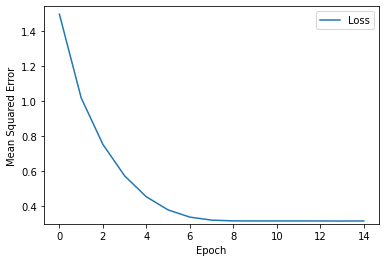


 Evaluate the linear regression model against the test set:
1/1 [==============================] - 0s 178ms/step - loss: 0.3285 - mean_squared_error: 0.3285


[0.3284658193588257, 0.3284658193588257]

In [ ]:
learning_rate = 0.01
epochs = 15
batch_size = 1000
label_name = "name"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set.
epochs, mse = train_model(my_model, df_train_norm, epochs, batch_size, label_name)
plot_the_loss_curve(epochs, mse)

test_features = {name:np.array(value) for name, value in df_test_norm.items()}
test_label = np.array(test_features.pop(label_name)) # isolate the label
print("\n Evaluate the linear regression model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)